In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [35]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

In [8]:
# read raw csv by marking dropping missing values
missing_values = ['NIL', 'nil', '']
raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'all-station_raw.csv'), 
                     na_values=missing_values)

raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Station                           4954 non-null   object 
 1   Year                              4954 non-null   int64  
 2   Month                             4954 non-null   int64  
 3   Day                               4954 non-null   int64  
 4   Max Temp. (degree Celcius)        4948 non-null   float64
 5   Min Temp. (degree Celcius)        4948 non-null   float64
 6   Rainfall (mm)                     4820 non-null   float64
 7   Actual Evaporation (mm)           4436 non-null   float64
 8   Relative Humidity (morning, %)    4950 non-null   float64
 9   Relative Humidity (afternoon, %)  4918 non-null   float64
 10  Sunshine (hour/day)               4939 non-null   float64
 11  Cloudy (hour/day)                 4767 non-null   float64
 12  Solar 

In [19]:
raw_df.shape[0] - raw_df.dropna().shape[0]

839

Number of instances with atleast one missing value = 839

# Min-max scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# only numerical columns are scalable
scalable_cols = [c for c in raw_df.columns if c!='Station']

raw_df_mmScaled = raw_df.copy()
raw_df_mmScaled[scalable_cols] = scaler.fit_transform(raw_df_mmScaled[scalable_cols])

raw_df_mmScaled.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,0.25,0.0,0.000000,0.059036,0.083410,0.0,0.04902,0.94,0.069351,0.086301,0.007937,0.001560
1,Barisal,0.25,0.0,0.033333,0.059839,0.083410,0.0,0.04902,0.94,0.069351,0.075342,0.009347,0.001436
2,Barisal,0.25,0.0,0.066667,0.060643,0.080965,0.0,0.04902,0.94,0.068233,0.084932,0.008113,0.001545
3,Barisal,0.25,0.0,0.100000,0.059839,0.084632,0.0,0.04902,0.94,0.071588,0.086301,0.007937,0.001560
4,Barisal,0.25,0.0,0.133333,0.050201,0.078521,0.0,0.04902,0.94,0.076063,0.054795,0.011993,0.001202


# Drop instances with missing data for any column

In [30]:
raw_df_mmScaled_dropna = raw_df_mmScaled.copy()

In [31]:
raw_df_mmScaled_dropna.shape[0]

4954

In [32]:
raw_df_mmScaled_dropna.dropna(inplace=True)

In [34]:
raw_df_mmScaled_dropna.shape[0]

4115

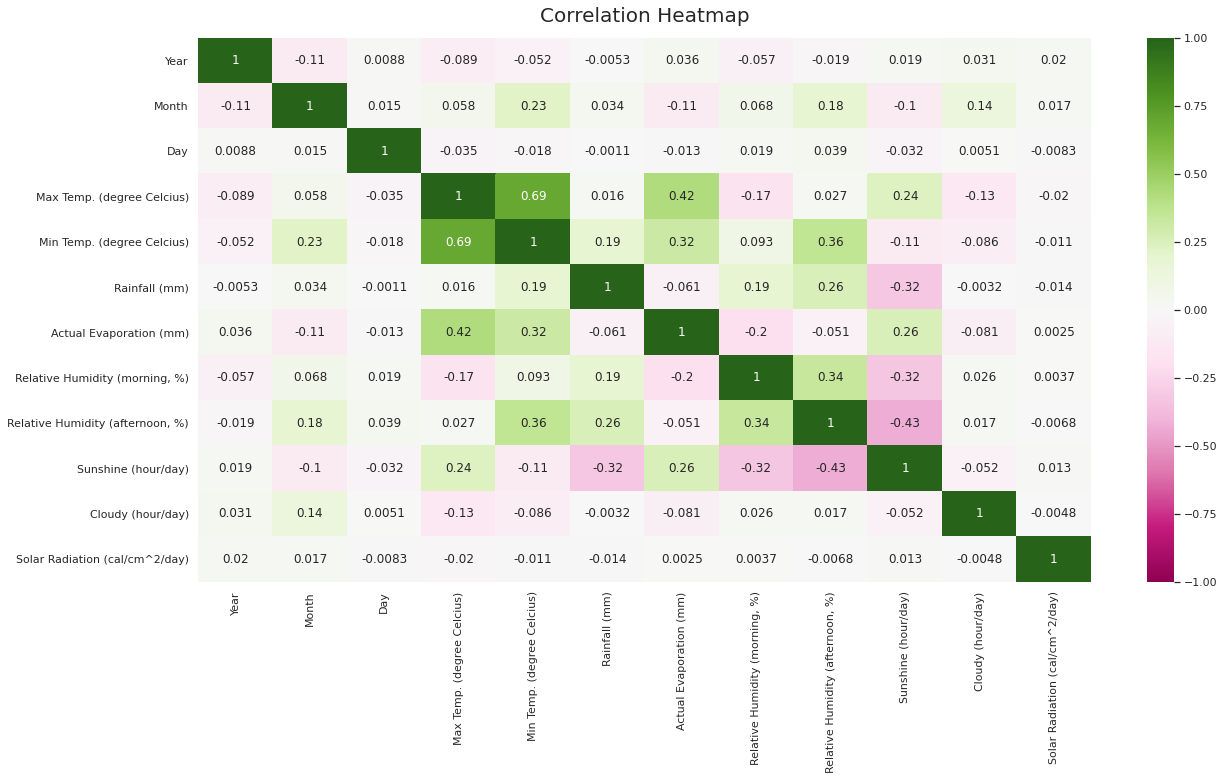

In [37]:
show_corr_heatmap(raw_df.dropna())

# Fill missing data by fill forward

not appropriate, can't fill in barisal's data with rangpur's data

In [61]:
raw_df_mmScaled_ffill = raw_df_mmScaled.copy()

for col in raw_df_mmScaled_ffill.columns:
    raw_df_mmScaled_ffill[col].fillna(method='ffill', inplace=True)
    
raw_df_mmScaled_ffill.shape[0] - raw_df_mmScaled_ffill.dropna().shape[0]

0

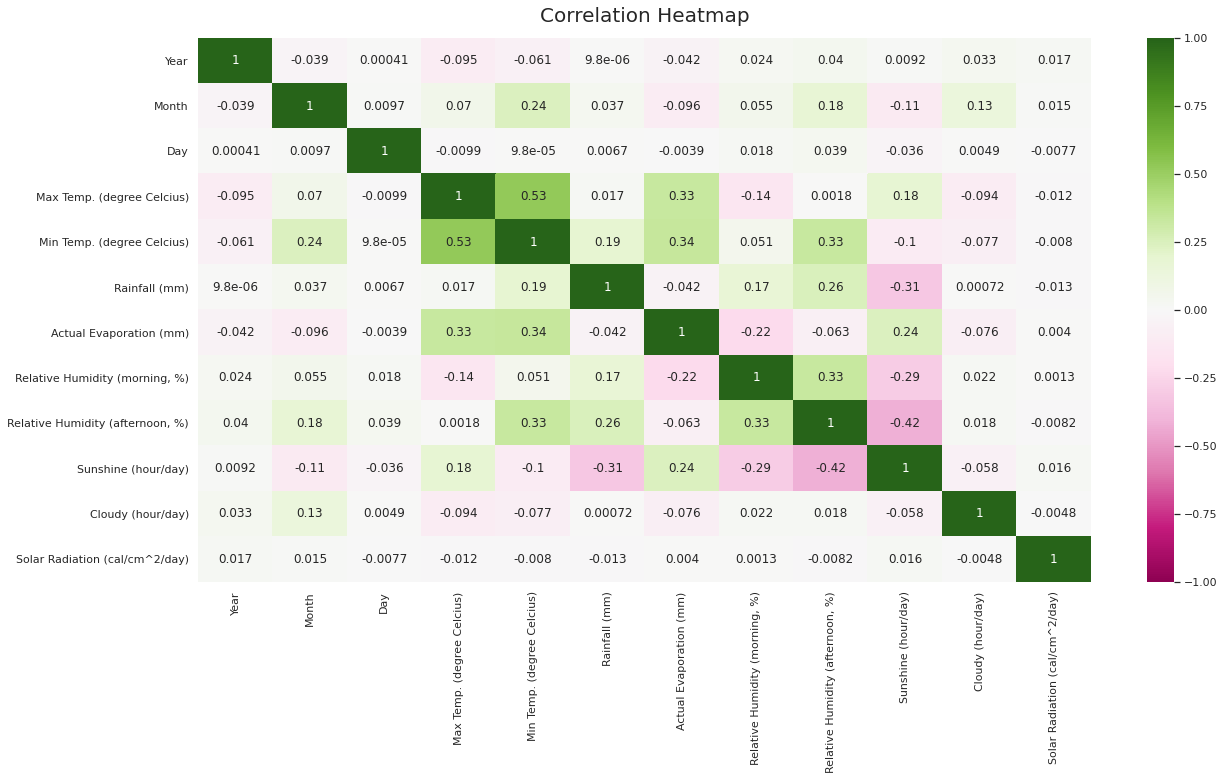

In [62]:
show_corr_heatmap(raw_df_mmScaled_ffill)

# Fill missing data by interpolation (find out more)

not appropriate, can't fill in barisal's data with rangpur's data

In [59]:
raw_df_mmScaled_ipn = raw_df_mmScaled.copy()

for col in raw_df_mmScaled_ipn.columns:
    raw_df_mmScaled_ipn[col].interpolate(method='linear', inplace=True)
    
raw_df_mmScaled_ipn.shape[0] - raw_df_mmScaled_ipn.dropna().shape[0]

0

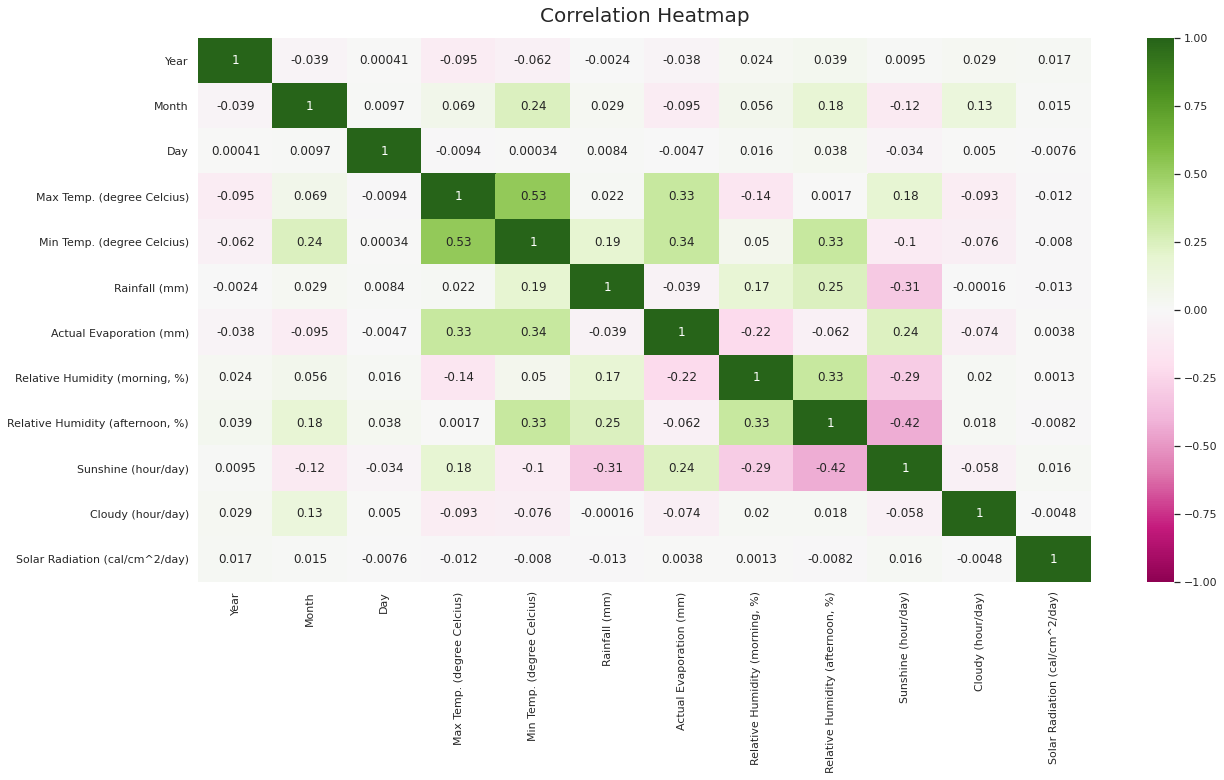

In [60]:
show_corr_heatmap(raw_df_mmScaled_ipn)